In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import linregress
from scipy import stats

<div style="text-align: center;">
    
# FIRST PART: 

</div>

## LOAD TORTILLA PRICE CSV AND DATA CLEANING
### IN THIS PART WE WILL LOAD THE CSV AND THEN CLEAN THE DATA IN ORDER TO HAVE 10 YEARS OF USEFUL DATA TO BE ABLE TO OBTAIN PLOTS AND GET USEFUL ANALYSIS WITH THE DATA


In [3]:
# LOADING TORTILLA PRICES CSV 

tortilla_data = pd.read_csv("Resources/tortilla_prices.csv")

tortilla_data.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [8]:
# FIRST ANALYSIS OF THE DATA CONTAINED
tortilla_data

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
...,...,...,...,...,...,...,...
289141,Veracruz,Coatzacoalcos,2024,10,21,Big Retail Store,12.57
289142,Veracruz,Veracruz,2024,10,21,Big Retail Store,13.27
289143,Veracruz,Xalapa,2024,10,21,Big Retail Store,13.73
289144,Yucatán,Mérida,2024,10,21,Big Retail Store,13.13


In [9]:
#Selecting only 10 years of Data (2014 to 2024)

tortilla_data_filtered = tortilla_data[tortilla_data['Year'] >= 2014]

tortilla_data_filtered

,State,City,Year,Month,Day,Store type,Price per kilogram
113484,Aguascalientes,Aguascalientes,2014,1,3,Mom and Pop Store,12.00
113485,Baja California,Mexicali,2014,1,3,Mom and Pop Store,16.29
113486,Baja California,Tijuana,2014,1,3,Mom and Pop Store,13.55
113487,Baja California Sur,La Paz,2014,1,3,Mom and Pop Store,14.25
113488,Campeche,Campeche,2014,1,3,Mom and Pop Store,14.50
...,...,...,...,...,...,...,...
289141,Veracruz,Coatzacoalcos,2024,10,21,Big Retail Store,12.57
289142,Veracruz,Veracruz,2024,10,21,Big Retail Store,13.27
289143,Veracruz,Xalapa,2024,10,21,Big Retail Store,13.73
289144,Yucatán,Mérida,2024,10,21,Big Retail Store,13.13


In [10]:
# Cleaning the data to later plotting

tortilla_data_cleaned_2 = tortilla_data_filtered.dropna(subset=['Price per kilogram'])

tortilla_data_cleaned_2

,State,City,Year,Month,Day,Store type,Price per kilogram
113484,Aguascalientes,Aguascalientes,2014,1,3,Mom and Pop Store,12.00
113485,Baja California,Mexicali,2014,1,3,Mom and Pop Store,16.29
113486,Baja California,Tijuana,2014,1,3,Mom and Pop Store,13.55
113487,Baja California Sur,La Paz,2014,1,3,Mom and Pop Store,14.25
113488,Campeche,Campeche,2014,1,3,Mom and Pop Store,14.50
...,...,...,...,...,...,...,...
289141,Veracruz,Coatzacoalcos,2024,10,21,Big Retail Store,12.57
289142,Veracruz,Veracruz,2024,10,21,Big Retail Store,13.27
289143,Veracruz,Xalapa,2024,10,21,Big Retail Store,13.73
289144,Yucatán,Mérida,2024,10,21,Big Retail Store,13.13


In [11]:
#Saving our csv to later use in the other files 

tortilla_data_cleaned_2.to_csv("Resources/new_tortilla.csv", index_label="State")

In [12]:
grouped_2 = tortilla_data_cleaned_2.groupby(['State', 'Year']).agg({'Price per kilogram': 'mean'}).reset_index()
grouped_2

,State,Year,Price per kilogram
0,Aguascalientes,2014,10.998914
1,Aguascalientes,2015,10.825946
2,Aguascalientes,2016,10.933733
3,Aguascalientes,2017,11.003456
4,Aguascalientes,2018,11.406921
...,...,...,...
347,Zacatecas,2020,13.485481
348,Zacatecas,2021,14.593146
349,Zacatecas,2022,15.998767
350,Zacatecas,2023,17.127416


In [86]:
#Saving our csv to later use in the other files 
grouped_2.to_csv("Resources/grouped_tortilla.csv", index=True)

<div style="text-align: center;">
    
# SECOND PART: 

</div>

## LINE PLOTS OF INCREASE IN PRICE FROM 2014 TO 2024
### IN THIS PART WE WILL PLOT THE PRICE INCREASE OF TORTILLA THROUGH 2014 TO 2024 ON ALL THE STATES ON MEXICO AND THEN ON THE TOP 5 AND BOTTOM 5 STATES 

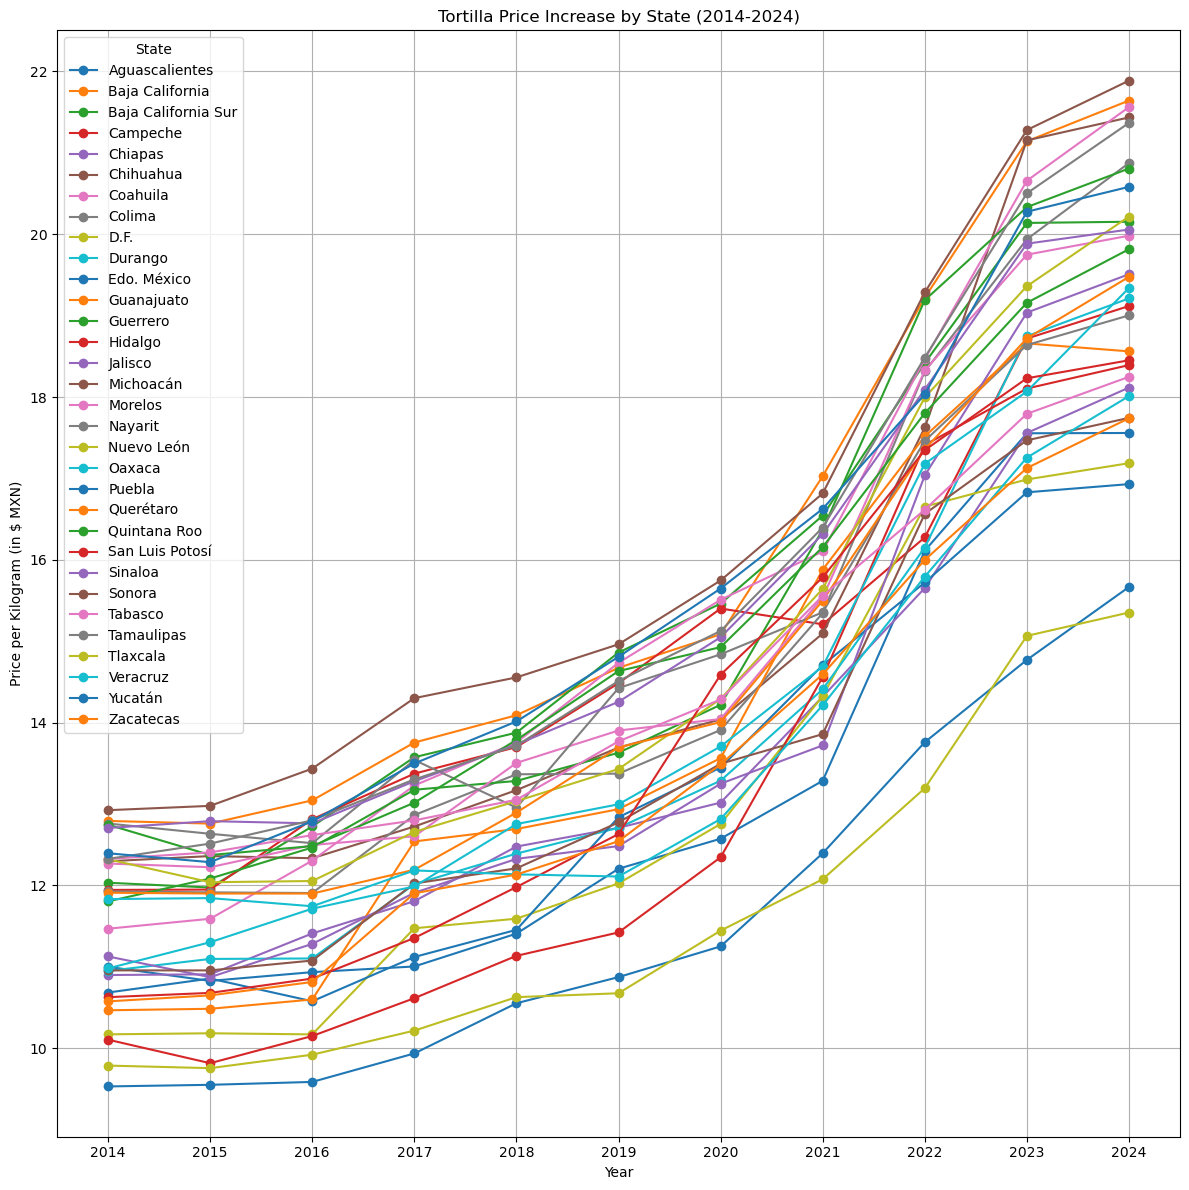

In [13]:
# Crear la gráfica
plt.figure(figsize=(12, 12))
# Graficar los precios por estado a lo largo de los años
for state in grouped_2['State'].unique():
    state_data = grouped_2[grouped_2['State'] == state]
    plt.plot(state_data['Year'], state_data['Price per kilogram'], marker='o', label=state)

plt.title('Tortilla Price Increase by State (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Price per Kilogram (in $ MXN)')
plt.xticks(range(2014, 2025))  
plt.legend(title='State')
plt.grid()
plt.tight_layout() 

# Save the figure
plt.savefig("Resources/Fig1.png")

# Mostrar la gráfica
plt.show()

In [16]:
#Calculating the price on the first and last year of analysis of each state
price_2014 = grouped_2[grouped_2['Year'] == 2014].set_index('State')['Price per kilogram']
price_2024 = grouped_2[grouped_2['Year'] == 2024].set_index('State')['Price per kilogram']

# Calculating the changue of price
increment = price_2024 - price_2014

# Get the results into a dataframe
increment_df = increment.reset_index()
increment_df.columns = ['State', 'Price Increment']

increment_df.head(10)

,State,Price Increment
0,Aguascalientes,6.559419
1,Baja California,8.851071
2,Baja California Sur,8.121665
3,Campeche,7.174103
4,Chiapas,7.217968
5,Chihuahua,9.140124
6,Coahuila,10.095213
7,Colima,8.950044
8,D.F.,7.017408
9,Durango,8.263282


In [17]:
#Get the 5 states with the highest increment

# Obtener los 5 estados con mayor incremento
top_5_increment = increment_df.nlargest(5, 'Price Increment')

#Get the 5 states with the lowest increment
bottom_5_increment = increment_df.nsmallest(5, 'Price Increment')

print(" \n  5 states with HIGHER increment on price")
print(top_5_increment)
print("\n  5 states with LOWER increment on price :")
print(bottom_5_increment)

 
  5 states with HIGHER increment on price
         State  Price Increment
6     Coahuila        10.095213
5    Chihuahua         9.140124
27  Tamaulipas         9.042899
12    Guerrero         9.004061
25      Sonora         8.964257

  5 states with LOWER increment on price :
       State  Price Increment
28  Tlaxcala         5.567052
26   Tabasco         5.923615
20    Puebla         6.136592
29  Veracruz         6.179978
17   Nayarit         6.243645


In [19]:
#Grouping the data on state and year by the mean price for later plotting

grouped = tortilla_data_cleaned_2.groupby(['State', 'Year'])['Price per kilogram'].mean().reset_index()
grouped

,State,Year,Price per kilogram
0,Aguascalientes,2014,10.998914
1,Aguascalientes,2015,10.825946
2,Aguascalientes,2016,10.933733
3,Aguascalientes,2017,11.003456
4,Aguascalientes,2018,11.406921
...,...,...,...
347,Zacatecas,2020,13.485481
348,Zacatecas,2021,14.593146
349,Zacatecas,2022,15.998767
350,Zacatecas,2023,17.127416


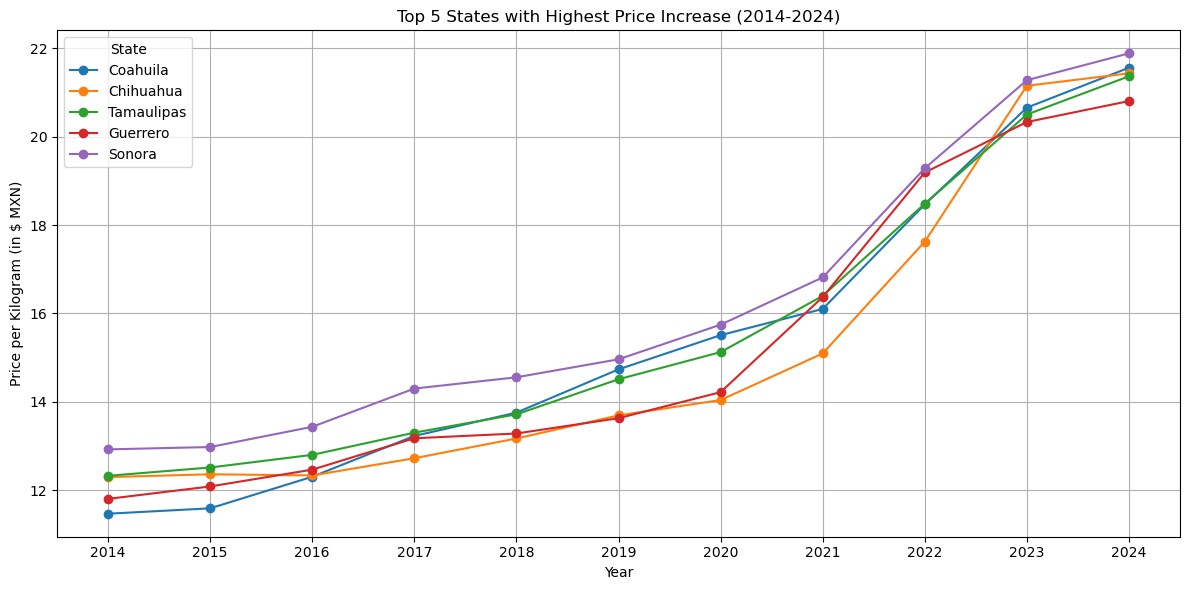

In [18]:
#Line plot of 5 the states with HIGHER increment on price

plt.figure(figsize=(12, 6))
for state in top_5_increment['State']:
    state_data = grouped_2[grouped_2['State'] == state]
    plt.plot(state_data['Year'], state_data['Price per kilogram'], marker='o', label=state)

plt.title('Top 5 States with Highest Price Increase (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Price per Kilogram (in $ MXN)')
plt.xticks(range(2014, 2025))  # Mostrar todos los años en el eje x
plt.legend(title='State')
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("Resources/Fig2.png")

plt.show()

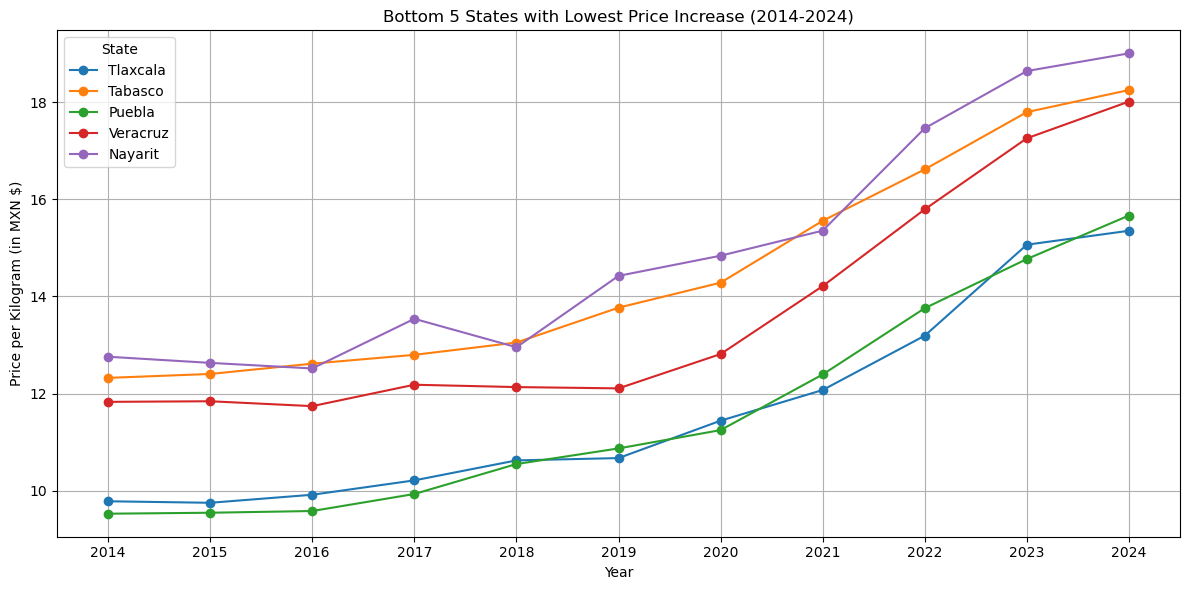

In [20]:
#Line plot of 5 the states with LOWEST increment on price
plt.figure(figsize=(12, 6))
for state in bottom_5_increment['State']:
    state_data = grouped_2[grouped_2['State'] == state]
    plt.plot(state_data['Year'], state_data['Price per kilogram'], marker='o', label=state)

plt.title('Bottom 5 States with Lowest Price Increase (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Price per Kilogram (in MXN $)')
plt.xticks(range(2014, 2025)) 
plt.legend(title='State')
plt.grid()
plt.tight_layout() 

# Save the figure
plt.savefig("Resources/Fig3.png")
plt.show()

<div style="text-align: center;">
    
# THIRD PART: 

</div>

## PRICE INCREASE VS INFLATION ANALYSIS
### IN THIS PART WE WILL LOAD A CSV TAKEN FROM AN OFFICIAL GOVERNMENT SITE TO BE ABLE TO COMPARE THE INFLATION RATE WITH THE PRICE INCREASE OF THE TORTILLA AND THEN ANALYZE IS THERE IS A CORRELATION BETWEEN THESE PARAMETERS

In [21]:
#loading intlation csv
inflacion_df = pd.read_csv("Resources/INFLACION.csv")
inflacion_df.head(10)


,Año,Tasa de Inflación
0,1996,27.70
1,1997,15.72
2,1998,18.61
3,1999,12.32
4,2000,8.96
5,2001,4.40
6,2002,5.70
7,2003,3.98
8,2004,5.19
9,2005,3.33


In [22]:
#cleaning the csv to have the years of interest
inflacion_df['Año'] = pd.to_numeric(inflacion_df['Año'], errors='coerce')
filter_inflacion = inflacion_df[(inflacion_df['Año'] >= 2014) & (inflacion_df['Año'] <= 2024)]
filter_inflacion.loc[:, 'Año'] = filter_inflacion['Año'].astype('Int64') 
filter_inflacion

,Año,Tasa de Inflación
18,2014,4.08
19,2015,2.13
20,2016,3.36
21,2017,6.77
22,2018,4.83
23,2019,2.83
24,2020,3.15
25,2021,7.36
26,2022,7.82
27,2023,4.66


In [23]:
filter_inflacion = filter_inflacion.rename(columns={"Año":"Year", "Tasa de Inflación":"Inflation Rate"})

print("\nDataFrame Historic Inflation Rate")
filter_inflacion.head()


DataFrame Historic Inflation Rate


,Year,Inflation Rate
18,2014,4.08
19,2015,2.13
20,2016,3.36
21,2017,6.77
22,2018,4.83


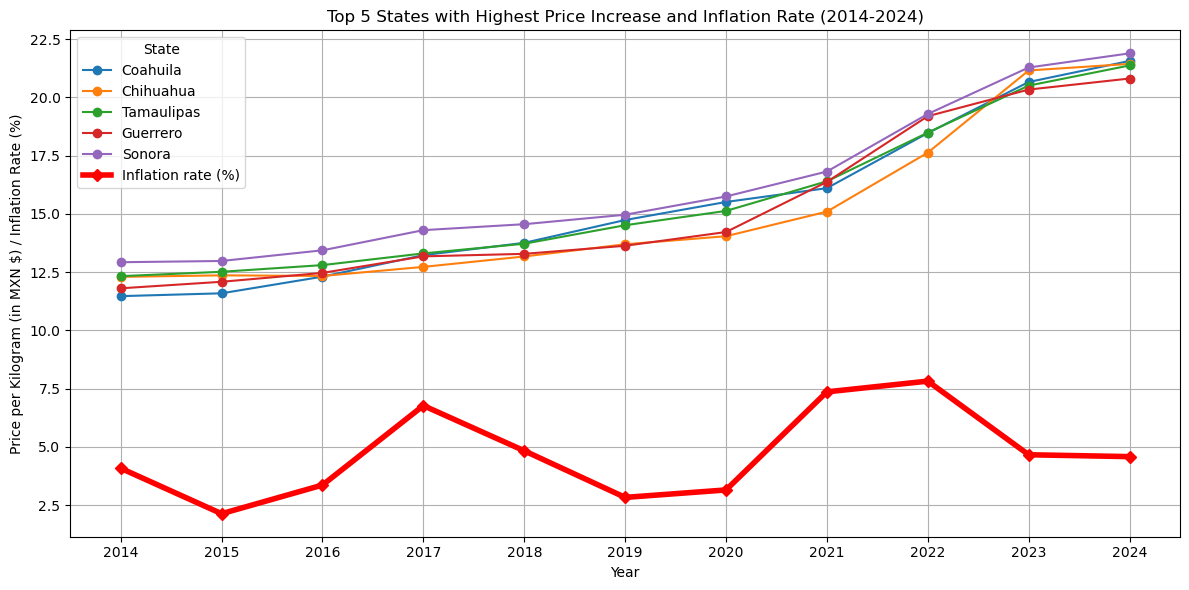

In [24]:
# Plotting the previous chart of TOP 5 States but adding the inflation increase rate to be able to compare the lines
plt.figure(figsize=(12, 6))

for state in top_5_increment['State']:
    state_data = grouped_2[grouped_2['State'] == state]

    if not state_data.empty:
        plt.plot(state_data['Year'], state_data['Price per kilogram'], marker='o', label=state)

plt.plot(filter_inflacion['Year'], filter_inflacion['Inflation Rate'], 
         marker='D', color='r', linewidth=4, label='Inflation rate (%)')

plt.title('Top 5 States with Highest Price Increase and Inflation Rate (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Price per Kilogram (in MXN $) / Inflation Rate (%)')
plt.xticks(range(2014, 2025))  
plt.legend(title='State')
plt.grid()
plt.tight_layout()  

# Save the figure
plt.savefig("Resources/Fig4.png")

# Mostrar la gráfica
plt.show()

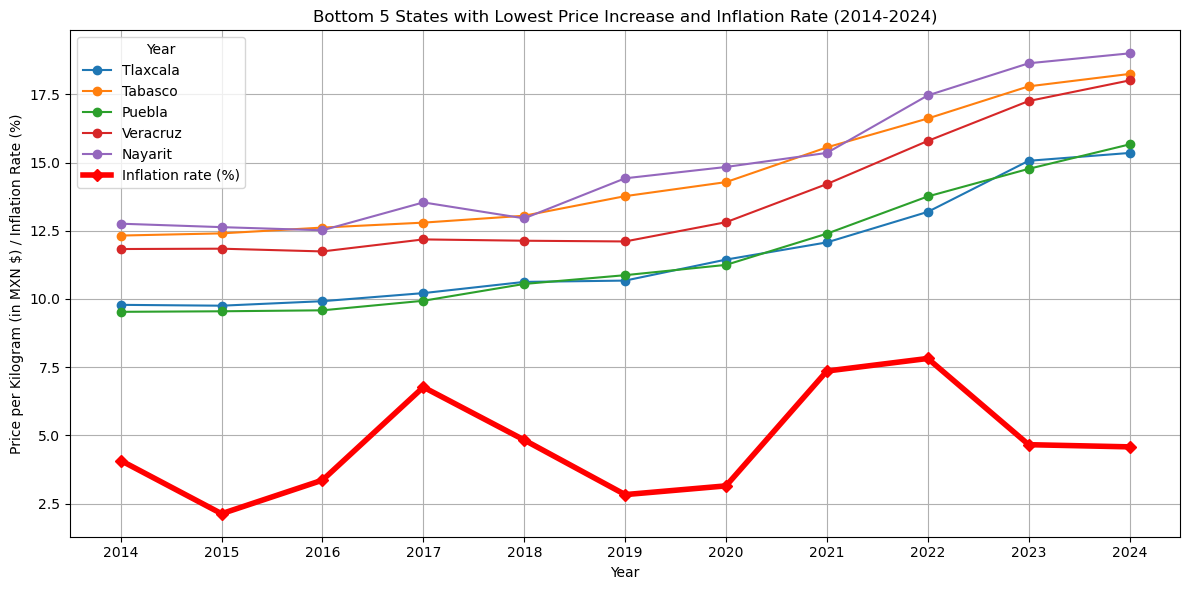

In [25]:
# Plotting the previous chart of BOTTOM 5 States but adding the inflation increase rate to be able to compare the line
plt.figure(figsize=(12, 6))


for state in bottom_5_increment['State']:
   
    state_data = grouped_2[grouped_2['State'] == state]
    
    if not state_data.empty:
        plt.plot(state_data['Year'], state_data['Price per kilogram'], marker='o', label=state)

# Graficar la tasa de inflación como una línea adicional
plt.plot(filter_inflacion['Year'], filter_inflacion['Inflation Rate'], 
         marker='D', color='r', linewidth=4, label='Inflation rate (%)')

# Añadir detalles a la gráfica
plt.title('Bottom 5 States with Lowest Price Increase and Inflation Rate (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Price per Kilogram (in MXN $) / Inflation Rate (%)')
plt.xticks(range(2014, 2025))  
plt.legend(title='Year')
plt.grid()
plt.tight_layout()  

# Save the figure
plt.savefig("Resources/Fig5.png")


# Mostrar la gráfica
plt.show()

In [26]:
#renaming the inflation DF to be able to merge DFS
new_filter_inflacion = filter_inflacion.rename(columns={'Año': 'Year'}).copy()
new_filter_inflacion


,Year,Inflation Rate
18,2014,4.08
19,2015,2.13
20,2016,3.36
21,2017,6.77
22,2018,4.83
23,2019,2.83
24,2020,3.15
25,2021,7.36
26,2022,7.82
27,2023,4.66


In [27]:
#grouping the DFS to do scatter plots and regression analysis on the TOP 5 States
filtered_grouped = grouped[grouped['State'].isin(top_5_increment['State'])]
combined_df = pd.merge(filtered_grouped, new_filter_inflacion, on='Year', how='outer')
combined_df.head(10)

,State,Year,Price per kilogram,Inflation Rate
0,Chihuahua,2014,12.295710,4.08
1,Coahuila,2014,11.467439,4.08
2,Guerrero,2014,11.803564,4.08
3,Sonora,2014,12.923587,4.08
4,Tamaulipas,2014,12.325351,4.08
5,Chihuahua,2015,12.360000,2.13
6,Coahuila,2015,11.589369,2.13
7,Guerrero,2015,12.083970,2.13
8,Sonora,2015,12.976774,2.13
9,Tamaulipas,2015,12.513277,2.13


R squared: 0.12893133515675592


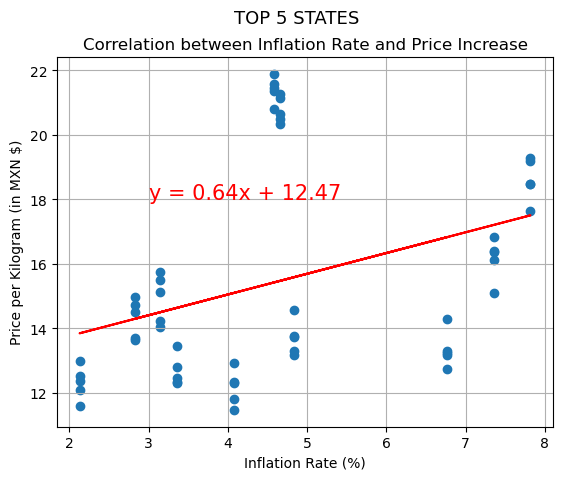

In [30]:
# Creating the scatter plot and running a correlation analysis with linear regression for the TOP 5 states
x_values = combined_df["Inflation Rate"].astype("float")
y_values = combined_df["Price per kilogram"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,18),fontsize=15,color="red")

plt.suptitle('TOP 5 STATES', fontsize=13)
plt.title('Correlation between Inflation Rate and Price Increase')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Price per Kilogram (in MXN $)')
plt.grid()
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Resources/Fig7.png")

plt.show()

In [31]:
#grouping the DFS to do scatter plots and regression analysis on the BOTTOM 5 States
filtered_grouped_2 = grouped[grouped['State'].isin(bottom_5_increment['State'])]
combined_df_2 = pd.merge(filtered_grouped_2, new_filter_inflacion, on='Year', how='outer')
combined_df_2.head(10)

,State,Year,Price per kilogram,Inflation Rate
0,Nayarit,2014,12.759605,4.08
1,Puebla,2014,9.529387,4.08
2,Tabasco,2014,12.324801,4.08
3,Tlaxcala,2014,9.785364,4.08
4,Veracruz,2014,11.831217,4.08
5,Nayarit,2015,12.633446,2.13
6,Puebla,2015,9.549274,2.13
7,Tabasco,2015,12.404899,2.13
8,Tlaxcala,2015,9.754122,2.13
9,Veracruz,2015,11.843505,2.13


R squared: 0.09498412288660633


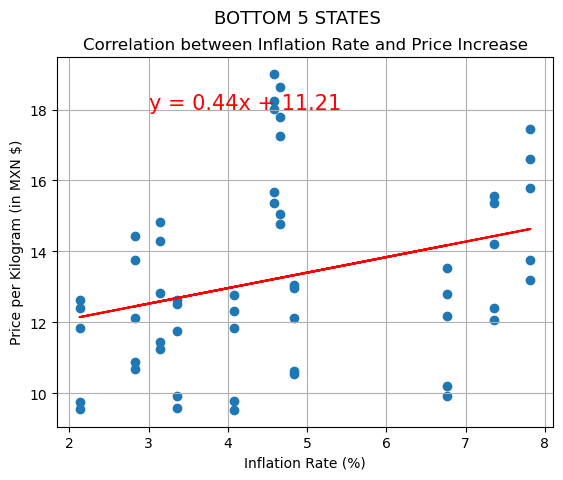

In [32]:
# Creating the scatter plot and running a correlation analysis with linear regression for the BOTTOM 5 states
x_values = combined_df_2["Inflation Rate"].astype("float")
y_values = combined_df_2["Price per kilogram"].astype("float")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,18),fontsize=15,color="red")

plt.suptitle('BOTTOM 5 STATES', fontsize=13)
plt.title('Correlation between Inflation Rate and Price Increase')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Price per Kilogram (in MXN $)')
plt.grid()
print(f"R squared: {rvalue**2}")

plt.savefig("Resources/Fig8.png")

plt.show()
